In [1]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


Display the Digits
The following code shows what the MNIST files contain.

In [2]:
from IPython.display import display
import pandas as pd

# Display as text
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows', 5)

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [5 0 4 ... 5 6 8]
Shape for single: (28, 28)


,0,1,2,3,4,5,6,...,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0
27,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0


Image (#105): Which is digit '1'


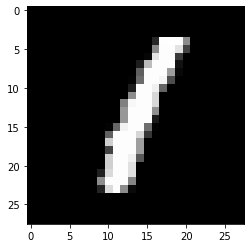

In [3]:
# Display Image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

digit = 105 # Change to choose new digit
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

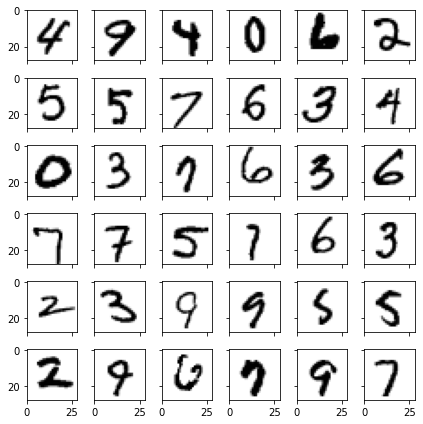

In [4]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [5]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /=255
x_test /=255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# Convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


# Training/Fitting CNN - DIGITS
The following code will train the CNN for 20,000 steps. This can take awhile, you might want to scale the step count back. GPU training can help. My results:

* CPU Training Time: Elapsed time: 1:50:13.10
* GPU Training Time: Elapsed time: 0:13:43.06

In [16]:
import tensorflow as tf
import time
tf.config.list_physical_devices('GPU')
start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time
#print("Elapsed time: {}".format(hms_string(elapsed_time)))

Epoch 1/12
469/469 - 2s - loss: 0.1260 - accuracy: 0.9526 - val_loss: 0.2250 - val_accuracy: 0.9258
Epoch 2/12
469/469 - 2s - loss: 0.1200 - accuracy: 0.9552 - val_loss: 0.2158 - val_accuracy: 0.9298
Epoch 3/12
469/469 - 2s - loss: 0.1137 - accuracy: 0.9569 - val_loss: 0.2300 - val_accuracy: 0.9279
Epoch 4/12
469/469 - 2s - loss: 0.1082 - accuracy: 0.9590 - val_loss: 0.2281 - val_accuracy: 0.9303
Epoch 5/12
469/469 - 2s - loss: 0.1020 - accuracy: 0.9610 - val_loss: 0.2462 - val_accuracy: 0.9246
Epoch 6/12
469/469 - 2s - loss: 0.0979 - accuracy: 0.9627 - val_loss: 0.2322 - val_accuracy: 0.9303
Epoch 7/12
469/469 - 2s - loss: 0.0952 - accuracy: 0.9641 - val_loss: 0.2471 - val_accuracy: 0.9295
Epoch 8/12
469/469 - 2s - loss: 0.0899 - accuracy: 0.9662 - val_loss: 0.2462 - val_accuracy: 0.9278
Epoch 9/12
469/469 - 2s - loss: 0.0860 - accuracy: 0.9670 - val_loss: 0.2593 - val_accuracy: 0.9286
Epoch 10/12
469/469 - 2s - loss: 0.0832 - accuracy: 0.9675 - val_loss: 0.2537 - val_accuracy: 0.9304

In [8]:
# Predict using either GPU or CPU, send the entire dataset.  This might not work on the GPU.
# Set the desired TensorFlow output level for this example
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

Test loss: 0.0338759608566761
Test accuracy: 0.9933000206947327


GPUs are most often used for training rather than prediction. For prediction either disable the GPU or just predict on a smaller sample. If your GPU has enough memory, the above prediction code may work just fine. If not, just prediction on a sample with the following code:

In [9]:
from sklearn import metrics

# For GPU just grab the first 100 images
small_x = x_test[1:100]
small_y = y_test[1:100]
small_y2 = np.argmax(small_y,axis=1)
pred = model.predict(small_x)
pred = np.argmax(pred,axis=1)
score = metrics.accuracy_score(small_y2, pred)
print('Accuracy: {}'.format(score))

Accuracy: 1.0


In [10]:
import tensorflow.keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print("Shape of x_train: {}".format(x_train.shape))
print("Shape of y_train: {}".format(y_train.shape))
print()
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_test: {}".format(y_test.shape))

4423680/4422102 [==============================] - 0s 0us/step
Shape of x_train: (60000, 28, 28)
Shape of y_train: (60000,)

Shape of x_test: (10000, 28, 28)
Shape of y_test: (10000,)


# Display the Apparel
The following code shows what the Fashion MNIST files contain.

In [11]:
# Display as text
from IPython.display import display
import pandas as pd

print("Shape for dataset: {}".format(x_train.shape))
print("Labels: {}".format(y_train))

# Single MNIST digit
single = x_train[0]
print("Shape for single: {}".format(single.shape))

pd.set_option('display.max_columns', 7)
pd.set_option('display.max_rows', 10)
pd.DataFrame(single.reshape(28,28))

Shape for dataset: (60000, 28, 28)
Labels: [9 0 0 ... 3 0 5]
Shape for single: (28, 28)


,0,1,2,...,25,26,27
0,0,0,0,...,0,0,0
1,0,0,0,...,0,0,0
2,0,0,0,...,0,0,0
3,0,0,0,...,1,1,0
4,0,0,0,...,0,0,3
...,...,...,...,...,...,...,...
23,0,0,74,...,216,170,0
24,2,0,0,...,58,0,0
25,0,0,0,...,0,0,0
26,0,0,0,...,0,0,0


Image (#90): Which is digit '9'


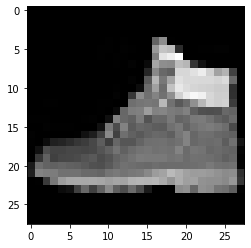

In [12]:
# Display as image
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
digit = 90 # Change to choose new article
a = x_train[digit]
plt.imshow(a, cmap='gray', interpolation='nearest')
print("Image (#{}): Which is digit '{}'".format(digit,y_train[digit]))

<Figure size 432x288 with 0 Axes>

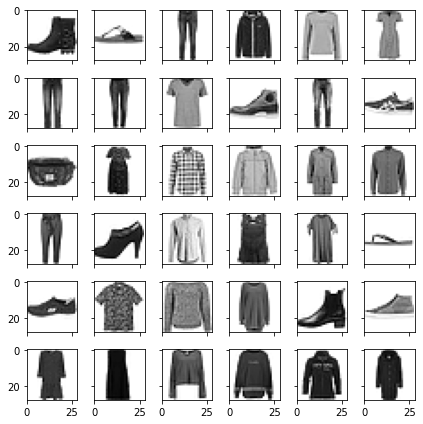

In [13]:
import random

ROWS = 6
random_indices = random.sample(range(x_train.shape[0]), ROWS*ROWS)

sample_images = x_train[random_indices, :]

plt.clf()

fig, axes = plt.subplots(ROWS,ROWS, 
                         figsize=(ROWS,ROWS),
                         sharex=True, sharey=True) 

for i in range(ROWS*ROWS):
    subplot_row = i//ROWS 
    subplot_col = i%ROWS
    ax = axes[subplot_row, subplot_col]

    plottable_image = np.reshape(sample_images[i,:], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')
    
    ax.set_xbound([0,28])

plt.tight_layout()
plt.show()

In [14]:
import tensorflow.keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print("Training samples: {}".format(x_train.shape[0]))
print("Test samples: {}".format(x_test.shape[0]))
# convert class vectors to binary class matrices
y_train = tensorflow.keras.utils.to_categorical(y_train, num_classes)
y_test = tensorflow.keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam',
              metrics=['accuracy'])

x_train shape: (60000, 28, 28, 1)
Training samples: 60000
Test samples: 10000


In [15]:
import tensorflow as tf
import time
tf.config.list_physical_devices('GPU')
start_time = time.time()

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss: {}'.format(score[0]))
print('Test accuracy: {}'.format(score[1]))

elapsed_time = time.time() - start_time

Epoch 1/12
469/469 - 2s - loss: 0.5145 - accuracy: 0.8183 - val_loss: 0.3254 - val_accuracy: 0.8804
Epoch 2/12
469/469 - 2s - loss: 0.3336 - accuracy: 0.8805 - val_loss: 0.2807 - val_accuracy: 0.8974
Epoch 3/12
469/469 - 2s - loss: 0.2842 - accuracy: 0.8987 - val_loss: 0.2576 - val_accuracy: 0.9037
Epoch 4/12
469/469 - 2s - loss: 0.2546 - accuracy: 0.9071 - val_loss: 0.2442 - val_accuracy: 0.9126
Epoch 5/12
469/469 - 2s - loss: 0.2318 - accuracy: 0.9155 - val_loss: 0.2254 - val_accuracy: 0.9164
Epoch 6/12
469/469 - 2s - loss: 0.2098 - accuracy: 0.9232 - val_loss: 0.2224 - val_accuracy: 0.9186
Epoch 7/12
469/469 - 2s - loss: 0.1923 - accuracy: 0.9283 - val_loss: 0.2106 - val_accuracy: 0.9235
Epoch 8/12
469/469 - 2s - loss: 0.1795 - accuracy: 0.9334 - val_loss: 0.2130 - val_accuracy: 0.9201
Epoch 9/12
469/469 - 2s - loss: 0.1654 - accuracy: 0.9372 - val_loss: 0.2141 - val_accuracy: 0.9217
Epoch 10/12
469/469 - 2s - loss: 0.1541 - accuracy: 0.9420 - val_loss: 0.2067 - val_accuracy: 0.9267